# Assignment 5

### Instructions

* Write your code in the cells provided.  Where appropirate, enter markdown to answer questions.

* Submit this notebook to owl.

---


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', 500)
from IPython.display import display
from sklearn import preprocessing
import random
%matplotlib inline

### You're a Data Scientist...Which is Just a Statistician on a Mac, Right?

Your models from the last assignment really impressed some of the management in your football club.  In the spirit of Moneyball (it was a book before it was a movie, I recomend you read it), managers want to test some hypotheses relating a player's overall rating and some of their characteristics in order to make better decisions on what players to trade/sign.

Management heard somewhere on the internet that statistics and data science are more or less the same thing (the truth of this is the subject of many debates) and would now like you to create some *statistical models* for inference instead of prediction.

In this assignment, you're going to take off your "data" hat and put on your "science" hat.

### The Dataset

To test some of the management's hypotheses, the football club has spent some money to go out and collect new data in `footballer_sample.csv`.  The variables are more or less the same from the previous dataset.

The data contain 52 columns, including some information about the player, their skills, and their overall measure as an effective footballer.

Most features relate to the player's abilities in football related skills, such as passing, shooting, dribbling, etc.  Some features are rated on a 1-5 scale (5 being the best), others are rated on 0-100 (100 being the best), and others still are categorical (e.g. work rate is coded as low, medium, or high).

The target variable (or $y$ variable, if you will) is `overall`.  This is an overall measure of the footballer's skill and is rated from 0 to 100.  The most amazingly skilled footballer would be rated 100, where as I would struggle to score more than a 20. The model(s) you build should use the other features to predict `overall`.



### Part A

Read in the data and take a look at the dataframe.  There should be 52 columns. The outcome of interest is called `overall` which gives an overall measure of player performance. Not all of the other columns are particularly useful for modelling though (for instance, `ID` is just a unique identifier for the player.  This is essentially an arbitrary number and has no bearing on the player's rating).

Remember that the Senior Data Scientist from the last assignment thinks the following columns should be removed:

* ID
* club
* club_logo
* birth_date
* flag
* nationality
* photo
* potential


That still sounds like a pretty good idea.  Remove those columns.  Keep the categorical variables as they are encoded.  Statsmodels will automatically dummy encode them for us

In [55]:
df_out = pd.read_csv('sampled_footballers.csv')
clean_df_with_categorical = df_out.drop(['ID', 'club', 'club_logo', 'birth_date', 'flag', 'nationality', 'photo', 'potential'], axis = 'columns')
clean_df_with_categorical.head()
#print(len(clean_df_with_categorical.columns))

,age,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle
0,20,175.0,70.0,58,65,30,38,56,60,53,1,3,3,Medium,High,Right,55,27,53,33,26,63,33,32,27,41,68,62,54,55,75,27,55,62,47,30,54,60,54,40,45,43,53,70
1,29,183.0,80.0,65,83,62,58,64,55,80,1,2,3,High,High,Right,63,59,64,62,55,62,46,59,43,64,81,85,73,68,65,70,75,90,77,59,78,53,60,61,68,65,52,56
2,35,183.0,78.0,67,46,66,63,66,50,71,1,3,3,High,Low,Right,51,67,69,69,61,65,63,65,64,66,34,55,78,66,51,65,72,54,80,63,67,59,70,64,67,65,45,43
3,24,178.0,72.0,69,77,69,48,70,21,39,1,3,3,Medium,Medium,Right,49,70,67,62,66,67,37,43,39,68,71,81,91,70,78,68,28,34,34,70,59,25,73,34,59,54,11,17
4,23,173.0,73.0,70,79,64,64,72,21,55,1,3,3,Medium,Medium,Right,66,66,58,68,64,70,46,48,59,71,76,82,79,68,78,65,34,69,57,59,36,19,67,66,63,63,13,18


### Part B

In statistics, it is useful to *standardize* our data to have mean 0 and standard deviation 1.  This has the effect of putting all the variables on the same scale.  It also has the added benefit of easing the interpretation of the coefficients to the following:

>Every 1 standard deviation change in the predictor $x$ results in a change of $\beta$ in the outcome.

Here, $\beta$ is the coefficient from the linear model we fit to the data. Standardize all the numeric variables.  A good way to check that you've done this correctly is to compute the means (which should be close to 0) and the standard deviations (which should be close to 1).

In [56]:
standardize_out = clean_df_with_categorical.select_dtypes(include = [np.number])
std_out = preprocessing.scale(standardize_out) 
std_out_out = pd.DataFrame(std_out,columns = standardize_out.columns)
std_out_out.head()

,age,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle
0,-1.086767,-0.949353,-0.747695,-1.135654,-0.186998,-1.552325,-1.787599,-0.559826,0.569803,-1.131340,-0.323421,0.985806,0.115849,0.335394,-0.864729,0.016805,-1.585610,-0.892889,0.456858,-0.713531,-0.606208,-1.606234,-0.969404,0.272424,-0.120551,-0.572666,-0.784151,0.814675,-1.567157,-0.845851,-0.001924,-1.337795,-0.811698,-0.081107,0.632282,0.283643,-0.922820,-0.215853,-1.047623,0.358980,0.996530
1,0.848512,0.276805,0.738776,-0.147638,1.446961,0.674428,0.093094,0.182403,0.277536,1.542052,-0.323421,-0.387183,0.115849,0.775834,0.788080,0.637127,0.295688,0.762300,0.404406,-0.005663,0.976733,-0.569285,0.413226,1.143860,1.442395,0.735420,0.665502,0.106139,0.889202,0.812355,1.681579,0.942797,0.695103,1.305336,0.287096,0.591951,0.592602,1.254708,0.592083,0.313192,0.352895
2,2.138698,0.276805,0.441482,0.134652,-1.911732,0.952772,0.563268,0.367960,-0.014730,0.650921,-0.323421,0.985806,0.115849,0.115175,1.201282,0.919092,0.749795,1.104753,0.561763,0.920011,1.328498,0.791710,0.533455,-2.006716,-0.596230,1.079653,0.442479,-0.885812,0.603579,0.563624,-0.482925,1.170856,0.902938,0.669883,0.582970,1.105797,0.809091,1.190771,0.592083,-0.007326,-0.244765
3,-0.226643,-0.489544,-0.450401,0.416943,0.902308,1.161530,-0.847253,0.739074,-1.709876,-2.517543,-0.323421,0.985806,0.115849,0.005065,1.356233,0.806306,0.295688,1.390131,0.666667,-0.495726,0.038694,-0.828522,0.653683,0.473525,1.170578,1.974659,0.888526,1.027235,0.774953,-3.084429,-1.685427,-2.326051,1.266648,0.207735,-1.093648,1.259951,-1.355797,0.679271,-0.227770,-1.564127,-1.440086
4,-0.441674,-1.255893,-0.301754,0.558088,1.083859,0.813600,0.657302,0.924631,-1.709876,-0.933311,-0.323421,0.985806,0.115849,0.940998,1.149632,0.298770,0.684922,1.275980,0.824023,-0.005663,0.331831,0.467664,0.834026,0.808693,1.238532,1.148499,0.665502,1.027235,0.603579,-2.586967,0.418952,-0.577598,0.695103,-1.120939,-1.389522,0.951643,0.953417,0.935021,0.443019,-1.472551,-1.394112


### Part C

One of the things scouts like to disagree upon is how a player changes as they age.  Some insist that players hit their prime in their late 20s and as they reach middle age, they become worse because they can't keep up with younger players.

Other scouts are certain that the experience a player gains over their tenure makes them more valuable; they can anticipate what will happen on the field much better than a new player.

You decide that a quadratic term for age in a statistical model might be worth investigating. Write down a statistical model for these competing hypotheses.  What is the null hypothesis? What is the alternative hypothesis?



I believe H0 is the quadratic term for age is not important and H1 is the quadratic term for age is important

### Part D

Fit your model from Part C.  What can you conclude from the model about the quadratic effect of age?  Answer in terms of the null hypothesis.

In [57]:
good_data = std_out_out.assign(age2 = std_out_out.age**2)
ols('overall ~ age+age2', data =good_data ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     118.0
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           1.14e-42
Time:                        11:04:17   Log-Likelihood:                -612.31
No. Observations:                 500   AIC:                             1231.
Df Residuals:                     497   BIC:                             1243.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2485      0.050      5.010      0.000       0.151       0.346
age            0.5725      0.038     14.931      0.000       0.497       0.648
age2          -0.2485      0.033     -7.504      0.000      -0.314      -0.183
==============================================================================
Omnibus:                       14.375   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.805
Skew:                           0.402   Prob(JB):                     0.000610
Kurtosis:                       3.253   Cond. No.                         2.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
The corresponding pvalue of age2 is p<0.001 so we have strong evidence against H0 (we reject H0). This means the quadratic age plays role and is important 

### Part E

Management would also like to know how marking (the player's ability to prevent the other team from getting the ball) and interceptions (taking the ball when the opposing team is passing the ball between players) impact a player's overall ranking, controlling for age.

Those sound awfully similar, don't they?  Fit two models: one model only controls for age (including the quadratic term) and marking, the other controls for age (including the quadratic term), marking, AND interceptions.

Answer the following:

* In 1-2 sentecnes, what are the differences between the coefficient for marking in the first and second model?  The size of the coefficient really isn't the issue.  Look at the sign of the coeffieicnt instead.

* In 1-2 sentences, why is this difference troubling? How does the interpretation of a one standard deviation change in marking change between models?

* In 1-2 sentences, what might explain this difference? You might want to look at `model_data.corr()`.

In [83]:
A1 = ols('overall ~ age+age2+marking', data =good_data ).fit()
print(A1.summary())
print(A1.params)
A2 = ols('overall ~ age+age2+marking+interceptions', data =good_data ).fit()
print(A2.summary())
print(A2.params)
good_data[['marking','interceptions']].corr()

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     84.46
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           3.70e-44
Time:                        12:38:06   Log-Likelihood:                -606.30
No. Observations:                 500   AIC:                             1221.
Df Residuals:                     496   BIC:                             1237.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2449      0.049      4.990      0.0

,marking,interceptions
marking,1.00000,0.93753
interceptions,0.93753,1.00000


In [ ]:
-As we can see, for the first model the coefficient of marking is positive whereas the coefficient of marking for the second model is negative.

- I think the reason should lie in the fact that we introduce interceptions in the model
this means if I do not have interceptions then marking is important (model one) but if I do have interceptions then the marking is not important(model 2
Following the model_data.corr(), marking and interceptions are strongly related or we can say there is a strong association between them
As I have understood, correation oefficient will only detect relationships and does not imply causation; that is, we two things are correlated this does not mean that if the first one causes a change in the second one or the second one causes a change in first one

### Part F

Fit the linear model `overall~ preferred_foot`.  Incredibly, the model says that **RIGHT FOOTED PLAYERS TEND TO BE WORSE AS COMPARED TO LEFT FOOTED PLAYERS**! Scounts don't believe you, this goes against everything they've believed about being left footed.  

Perform a randomization test on this data.  Perform 1000 randomizations of `preferred_foot`, fit the same model, and record the effects.  Plot a histogram of the effects from the randomized data and use `plt.axvline` to plot a vertical red line to indicate where the observed effect from our data lies.

Print out the p value (that is, the proportion of the resampled effects are larger than our observed effect in absolute value).

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     9.385
Date:                Tue, 15 Oct 2019   Prob (F-statistic):            0.00231
Time:                        12:09:43   Log-Likelihood:                -1683.8
No. Observations:                 500   AIC:                             3372.
Df Residuals:                     498   BIC:                             3380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

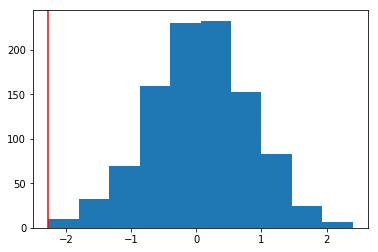

In [80]:
A3 = ols('overall ~ preferred_foot', data = clean_df_with_categorical).fit()

print(A3.summary())
out_coeff = np.zeros(1000)
old_column = pd.Series(clean_df_with_categorical['preferred_foot']).values

for i in range(1000):
    new_column = np.array(random.sample(list(old_column),len(old_column)))
    new_df = clean_df_with_categorical.assign(preferred_foot = new_column) 
    out_coeff[i] = ols('overall ~ preferred_foot', data = new_df).fit().params[1]
plt.hist(out_coeff)
plt.axvline(x=A3.params[1],color = 'r')
value_in = np.abs(A3.params[1])
counter = 0
for j in range(1000):
    if np.abs(out_coeff[j]) > value_in:
        counter += 1
print(f"the p value: {counter/1000}")

### Part G

Your findings from the randomization test are incredible; left footed players are on average 2.5 points better than their right footed counterparts!  The management is prepared to spend a lot of money to replace the team full of lefties in order to gain a slight advantage.

However, you have a sneaking suspicion this isn't the whole story.  Before management replaces the entire team, you decide to take a look at the dataset from your predictive model, called `footballer_data.csv`.  Load that data, clean it up as you did in part A, and perform another regression of overall onto preferred_foot, this time controlling for age (including the quadratic term) and interceptions.  Answer the following in a markdown cell:

* What is the p-value for the effect of being right footed?  

* What does that mean in terms of the null hypothesis?


In [76]:
df_out_out = pd.read_csv('footballer_data.csv')
clean_df_new = df_out_out.drop(['ID', 'club', 'club_logo', 'birth_date', 'flag', 'nationality', 'photo', 'potential'], axis = 'columns')
###Standardize
standardize_out_new = clean_df_new.select_dtypes(include = [np.number])
std_out_new = preprocessing.scale(standardize_out_new) 
std_out_out_new = pd.DataFrame(std_out_new,columns = standardize_out_new.columns)
std_out_out_new.head()
##########
preferred_column = pd.Series(clean_df_new['preferred_foot']).values
new_df_new = std_out_out_new.assign(preferred_foot = preferred_column)
new_df_new.head()
good_data_new = new_df_new.assign(age3 = new_df_new.age**2)

ols('overall ~ age+age3+interceptions+preferred_foot', data =good_data_new).fit().summary()
#good_data_new_new = std_out_out_new.assign(age2 = std_out_out_new.age**2)
#A4 = ols('overall ~ preferred_foot+interceptions+age+age2', data =good_data_new_new).fit()
#A4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     2157.
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        11:50:13   Log-Likelihood:                -22008.
No. Observations:               17994   AIC:                         4.403e+04
Df Residuals:                   17989   BIC:                         4.406e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.2175      0.014     15.935      0.000       0.191       0.244
preferred_foot[T.Right]    -0.0169      0.014     -1.168      0.243      -0.045       0.011
age                         0.4972      0.007     74.926      0.000       0.484       0.510
age3                       -0.2045      0.005    -38.724      0.000      -0.215      -0.194
interceptions               0.2062      0.006     32.490      0.000       0.194       0.219
==============================================================================
Omnibus:                      466.844   Durbin-Watson:                   0.590
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.822
Skew:                           0.364   Prob(JB):                    3.28e-116
Kurtosis:                       3.425   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
1-the p value of being right footed is 0.243
2- I H0 we said that being right footed is good (or left foot is not good) but now this value cannot rejects our H0
Note that H1 is being left foot is good, so when I cannot reject H0 is means I stick with H0 and being right food is good
in the previous part it was around 0.002 or 0.001 but now after using larger data we have got p value 0.243 

### Part H

The club owner, Owen Owner, saw the results of your randomization test and is convinced that he should replace the whole team with left-footed players. Using your results from Part G, write an email explaining to him why this isn't a worthwhile endeavour. 



Dear Owen Owner,

Thank you for taking the time to look at my statistical analysis. Regarding the club's preference for left-footed players as a result of the randomization test you saw...



Sincerely,

Junior Data Scientist

In [ ]:
after using the larger data the p value of being right footed is 0.243 which does not rejects our H0. Thus we need to use the right-footed players